## **AI CLUB-IGDTUW**



# **Major Project on "Employee Attrition" Dataset**
---
##### By Team Members:
##### Member 1 :-
Ananya Gupta , 07501172021 ,CSE-AI ,1st Yr

##### Member 2 :-
Sakshi Sihag , 05301172021 , CSE-AI , 1st Yr

##### Member 3 :-
Pari Khaitan , 05501172021 , CSE-AI ,1st Yr

## **Importing all the libraries and packages which will be required in the Project:**

In [166]:
#Importing different models to be used in the project
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm
from sklearn.svm import SVC ,SVR
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# For Data Processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Miscellaneous
import os
import random

## **Starting the analysis by importing the employee attrition dataset:**

In [167]:
data=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


####**Ques: Perform necessary analysis on the given dataset and pick any three suitable models for the prediction of Attrition.**

##### **Preprocessing of Dataset:**

In [168]:
#Viewing the first few rows

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [169]:
#Viewing the shape of the dataset
data.shape

(1470, 35)

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [171]:
#Print all of the object data types and their unique values
for column in data.columns:
    if data[column].dtype == object:
        print(str(column) + ' : ' + str(data[column].unique()))
        print(data[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_________________________________________________________________
Gender 

In [172]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [173]:
def preprocess_inputs(df):
  df = df.copy()
    
  # Drop single-value columns and id columns i.e.Remove unneeded columns
  df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
    
  # Binary-encode binary columns
  df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
  df['OverTime'] = df['OverTime'].replace({'No': 0, 'Yes': 1})
    
  # Ordinal-encode the BusinessTravel column
  df['BusinessTravel'] = df['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
    
  # One-hot encoding
  for column in ['Department', 'EducationField', 'JobRole', 'MaritalStatus']:
    df = onehot_encode(df, column=column)
    
  # Split df into X and y
  y = df['Attrition']
  X = df.drop('Attrition', axis=1)
    
  # Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
  # Scale X
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
  X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
  return X_train, X_test, y_train, y_test

In [174]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [175]:
X_train

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
99,0.762337,-2.005534,-0.816540,1.742140,0.092884,-0.669480,0.843888,0.055811,0.384204,-0.063108,...,2.128910,-0.255377,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165
785,0.326292,-0.141311,1.652087,1.366162,1.078220,-1.586784,0.843888,-0.239963,0.384204,0.838814,...,-0.469724,-0.255377,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165
918,1.525416,1.722911,-1.436773,-0.012423,0.092884,1.165128,0.843888,0.844541,0.384204,2.642657,...,-0.469724,3.915780,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,1.884966,-0.918742,-0.690165
1335,0.217281,-0.141311,0.035051,1.240836,1.078220,1.165128,0.843888,-1.225876,0.384204,-0.063108,...,-0.469724,-0.255377,-0.335309,-0.255377,2.017168,-0.533521,-0.237630,1.884966,-0.918742,-0.690165
1182,-0.109753,-2.005534,0.180264,-1.015031,1.078220,1.165128,-1.184992,-1.620241,-0.998124,-0.063108,...,-0.469724,-0.255377,2.982320,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.436787,1.722911,0.015361,-1.015031,1.078220,0.247824,-1.184992,0.893837,1.766532,-0.063108,...,-0.469724,-0.255377,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165
905,-0.872832,-0.141311,-0.311985,-1.015031,0.092884,1.165128,-1.184992,1.041724,-0.998124,1.740736,...,-0.469724,-0.255377,-0.335309,3.915780,-0.495745,-0.533521,-0.237630,1.884966,-0.918742,-0.690165
1096,0.326292,-0.141311,0.190109,-0.388401,-0.892452,0.247824,0.843888,-1.373763,0.384204,1.740736,...,-0.469724,3.915780,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,-0.918742,1.448930
235,0.653326,-0.141311,0.524838,0.864859,0.092884,1.165128,-1.184992,0.696654,0.384204,1.740736,...,-0.469724,3.915780,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165


In [176]:
y_train

99      No
785     No
918     No
1335    No
1182    No
        ..
715     No
905     No
1096    No
235     No
1061    No
Name: Attrition, Length: 1029, dtype: object

In [177]:
data.describe()[1:].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
Age,36.923810,9.135373,18.000000,30.000000,36.000000,43.000000,60.000000
DailyRate,802.485714,403.509100,102.000000,465.000000,802.000000,1157.000000,1499.000000
DistanceFromHome,9.192517,8.106864,1.000000,2.000000,7.000000,14.000000,29.000000
Education,2.912925,1.024165,1.000000,2.000000,3.000000,4.000000,5.000000
EmployeeCount,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeNumber,1024.865306,602.024335,1.000000,491.250000,1020.500000,1555.750000,2068.000000
EnvironmentSatisfaction,2.721769,1.093082,1.000000,2.000000,3.000000,4.000000,4.000000
HourlyRate,65.891156,20.329428,30.000000,48.000000,66.000000,83.750000,100.000000
JobInvolvement,2.729932,0.711561,1.000000,2.000000,3.000000,3.000000,4.000000
JobLevel,2.063946,1.106940,1.000000,1.000000,2.000000,3.000000,5.000000


In [178]:
fig = px.imshow(data.corr(),color_continuous_scale="Blues")
fig.update_layout(height=750)
fig.show()

In [179]:
data.isna().sum().sum()
#Therefore no missing values in the dataset

0

In [180]:
#Get the correlation of the columns
correlation = data.corr() 
correlation

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


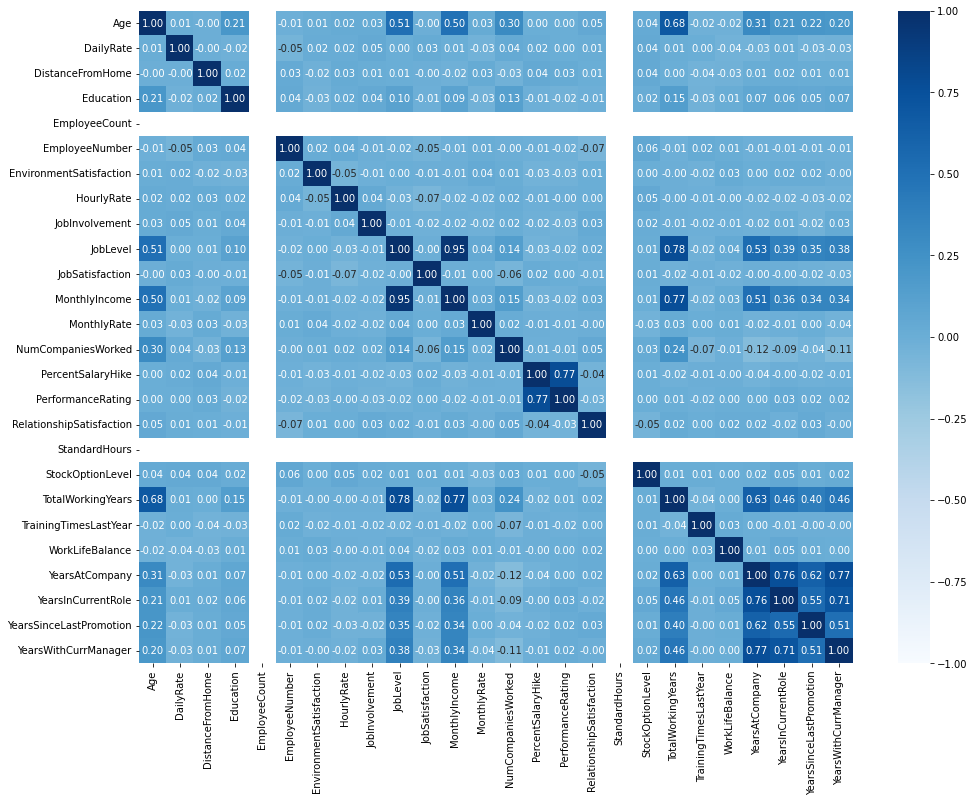

In [181]:
#Visualizing the correlation
plt.figure(figsize=(16,12))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Blues")
plt.show()

**Now, we move towards the training and testing of the dataset.**

In [182]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [183]:
X_train


,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
99,0.762337,-2.005534,-0.816540,1.742140,0.092884,-0.669480,0.843888,0.055811,0.384204,-0.063108,...,2.128910,-0.255377,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165
785,0.326292,-0.141311,1.652087,1.366162,1.078220,-1.586784,0.843888,-0.239963,0.384204,0.838814,...,-0.469724,-0.255377,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165
918,1.525416,1.722911,-1.436773,-0.012423,0.092884,1.165128,0.843888,0.844541,0.384204,2.642657,...,-0.469724,3.915780,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,1.884966,-0.918742,-0.690165
1335,0.217281,-0.141311,0.035051,1.240836,1.078220,1.165128,0.843888,-1.225876,0.384204,-0.063108,...,-0.469724,-0.255377,-0.335309,-0.255377,2.017168,-0.533521,-0.237630,1.884966,-0.918742,-0.690165
1182,-0.109753,-2.005534,0.180264,-1.015031,1.078220,1.165128,-1.184992,-1.620241,-0.998124,-0.063108,...,-0.469724,-0.255377,2.982320,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.436787,1.722911,0.015361,-1.015031,1.078220,0.247824,-1.184992,0.893837,1.766532,-0.063108,...,-0.469724,-0.255377,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165
905,-0.872832,-0.141311,-0.311985,-1.015031,0.092884,1.165128,-1.184992,1.041724,-0.998124,1.740736,...,-0.469724,-0.255377,-0.335309,3.915780,-0.495745,-0.533521,-0.237630,1.884966,-0.918742,-0.690165
1096,0.326292,-0.141311,0.190109,-0.388401,-0.892452,0.247824,0.843888,-1.373763,0.384204,1.740736,...,-0.469724,3.915780,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,-0.918742,1.448930
235,0.653326,-0.141311,0.524838,0.864859,0.092884,1.165128,-1.184992,0.696654,0.384204,1.740736,...,-0.469724,3.915780,-0.335309,-0.255377,-0.495745,-0.533521,-0.237630,-0.530514,1.088445,-0.690165


In [184]:
y_train


99      No
785     No
918     No
1335    No
1182    No
        ..
715     No
905     No
1096    No
235     No
1061    No
Name: Attrition, Length: 1029, dtype: object

## **TRAINING**

Initializing the models (Here, we have picked 3 models (any) of our choice)

1. Logistic Regression : C: Inverse of regularization strength (float), random state: (int), solver: sag,saga,liblinear (Here, we are using liblinear).


2. Random forest: Default parameters


3. Support vector machines: kernel can be linear, polynomial, RBF, sigmoid. Here we are using a linear kernel function.

In [185]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')

rm=RandomForestClassifier()

svm = svm.SVC(kernel='linear')

Now, from one block of code, we will check the accuracy, confusion matrix and f1 score of all the models.

## **1. Logistic Regression**

In [186]:
for a,b in zip([lr],["Logistic Regression"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    cm = confusion_matrix(y_test, y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
 
    print(msg1)
    print(msg2)
    print("Confusion matrix is:\n",cm)
    


    #calculate F1 score
    f1_lr = f1_score(y_test, y_pred, pos_label= 'Yes')
    print("F1 score: ", f1_lr)
   

[Logistic Regression] training data accuracy is : 0.896016
[Logistic Regression] test data accuracy is : 0.863946
Confusion matrix is:
 [[354  10]
 [ 50  27]]
F1 score:  0.4736842105263157


## **2. SVM**

In [187]:
for a,b in zip([svm],["SVM"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    cm = confusion_matrix(y_test, y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
 
    print(msg1)
    print(msg2)
    print("Confusion matrix is:\n",cm)

    #calculate F1 score
    f1_svm = f1_score(y_test, y_pred, pos_label= 'Yes')
    print("F1 score: ", f1_svm)

    

[SVM] training data accuracy is : 0.902818
[SVM] test data accuracy is : 0.863946
Confusion matrix is:
 [[352  12]
 [ 48  29]]
F1 score:  0.4915254237288135


## **3. Random Forest**

In [188]:
for a,b in zip([rm],["Random Forest"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    cm = confusion_matrix(y_test, y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
 
    print(msg1)
    print(msg2)
    print("Confusion matrix is:\n",cm)

    #calculate F1 score
    f1_rf = f1_score(y_test, y_pred, pos_label= 'Yes')
    print("F1 score: ", f1_rf)

[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.843537
Confusion matrix is:
 [[361   3]
 [ 66  11]]
F1 score:  0.24175824175824173


##**Ques. Plot the confusion matrix of all these models.**

#### **Plotting confusion matrix**

Logistic Regression Model **Confusion Matrix** 

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



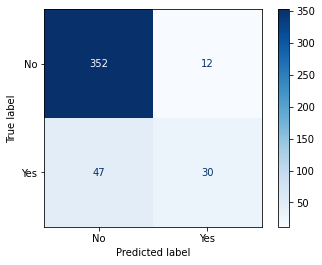

In [190]:
clf = LogisticRegression()
clf.fit(X_train, y_train);
#Confusion matrix of Logistic Regression Model
disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', values_format='.3g')

Random Forest Model **Confusion Matrix**

In [191]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



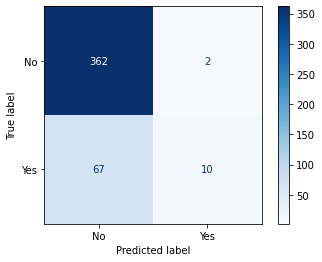

In [192]:
##Confusion matrix of Random Forest Model
disp = plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', values_format='.3g')

Support Vector Machine Model **Confusion Matrix**

In [193]:
from sklearn.svm import SVC
clg = SVC()
clg.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



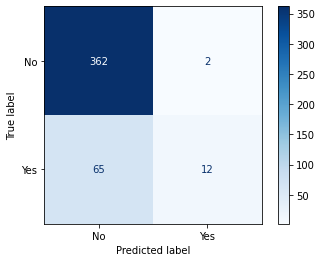

In [194]:
##Confusion matrix of Support Vector Machine Model
disp = plot_confusion_matrix(clg, X_test, y_test, cmap='Blues', values_format='.3g')

##**Ques. Plot a graph to study the accuracy of these three models.**

#### **Model Scores (accuracy)**


In [195]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             
            
             'Support Vector Machine':svm.score(X_test,y_test),
           
              
             'Random forest':rm.score(X_test,y_test)

              
             }
model_scores

{'Logistic Regression': 0.8639455782312925,
 'Random forest': 0.8435374149659864,
 'Support Vector Machine': 0.8639455782312925}

 **Here, we can see that "Logistic regression" and "Support Vector Machine" have the same and the best accuracy.**

####**Plotting accuracy** **graph**

In [196]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,Support Vector Machine,Random forest
accuracy,0.863946,0.863946,0.843537


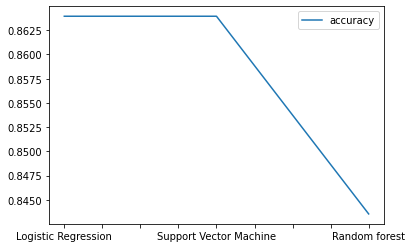

In [197]:
model_compare.T.plot(kind='line') # (T is here for transpose)

##**Ques. Plot a graph to study the f1-scores of these three models, and then choose the best model.**


#### **F1 Scores**

When the skew in the class distributions are severe, accuracy can become an unreliable measure of model performance. The reason for this unreliability is centered around the average machine learning practitioner and the intuitions for classification accuracy.

F1-Score or F-measure is an evaluation metric for a classification defined as the harmonic mean of precision and recall. It is a statistical measure of the accuracy of a test or model. Mathematically, it is expressed as follows,

f1 score = (2*recall**precision)/(recall+precision)

Recall: It tells us what proportion of Data belonging to a certain class say, class A is classified correctly as in class A by our classifier.


Precision: It tells us what proportion of data that our classifier has classified in a certain class, say class A actually belongs to the same class A.

In [198]:
F1_scores={}
F1_scores={'Logistic Regression':f1_lr,
           
           'Support Vector Machine':f1_svm,

           'Random forest':f1_rf}

F1_scores

{'Logistic Regression': 0.4736842105263157,
 'Random forest': 0.24175824175824173,
 'Support Vector Machine': 0.4915254237288135}

In [199]:
F1_scores_compare=pd.DataFrame(F1_scores,index=['f1_score'])
F1_scores_compare

,Logistic Regression,Support Vector Machine,Random forest
f1_score,0.473684,0.491525,0.241758


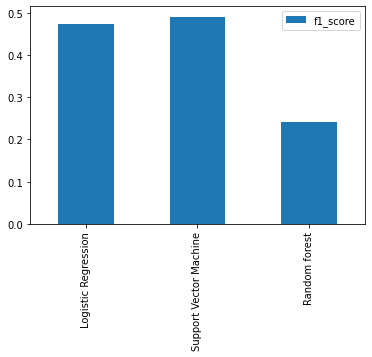

In [200]:
F1_scores_compare.T.plot(kind='bar') # (T is here for transpose)

**As we can see, F1 score of SVM is highest, followed by logistic regression. Random forest have the least F1 score.**
## **So SVM is the best model according to F1 score.** 

##**Q. Explain in the brief why you have chosen this model.**

### **Model Chosen: SVM**

**Support Vector Machine** has the highest accuracy, meaning it guesses correctly **86.39%** of the predictions.

Reasons to chose SVM:
1. It has the highest F1 score among SVM, Logistic Regression and Random Forest.
2. It has highest accuracy among SVM, Logistic Regression and Random Forest.


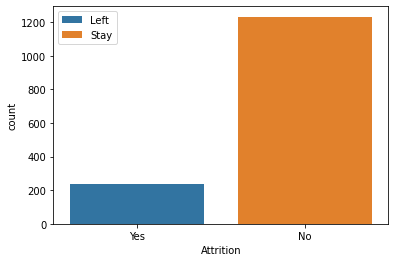

In [201]:
#visualize the number of employess that stayes and left the company
ax = sns.countplot(x='Attrition', hue='Attrition', dodge=False, data=data)
ax.legend(labels = ['Left', 'Stay']) 

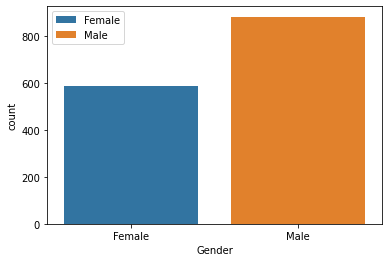

In [202]:
ax = sns.countplot(x='Gender',hue='Gender', dodge=False, data=data)
ax.legend(labels = ['Female', 'Male']) 


In [203]:
feature_dict=dict(zip(data.columns,list(svm.coef_[0])))
feature_dict

{'Age': -0.2042345201573641,
 'Attrition': 0.29765608096149154,
 'BusinessTravel': -0.0694342142847022,
 'DailyRate': 0.2651056814927504,
 'Department': 0.041122020584984265,
 'DistanceFromHome': -0.32841221485886196,
 'Education': 0.09282630747783571,
 'EducationField': 0.09643738061401663,
 'EmployeeCount': -0.24138754575047439,
 'EmployeeNumber': -0.07831146438946313,
 'EnvironmentSatisfaction': -0.21375860485038967,
 'Gender': 0.09088179039333477,
 'HourlyRate': 0.07883838448370373,
 'JobInvolvement': 0.2446904869947566,
 'JobLevel': 0.5366655964528437,
 'JobRole': -0.014414185564962878,
 'JobSatisfaction': -0.03180220618965679,
 'MaritalStatus': -0.14144982878444257,
 'MonthlyIncome': -0.13812782810701008,
 'MonthlyRate': -0.2859761669299057,
 'NumCompaniesWorked': -0.14669367374058595,
 'Over18': -0.19836040330165639,
 'OverTime': 0.2400706216397519,
 'PercentSalaryHike': -0.21833403165606358,
 'PerformanceRating': 0.30118412097150005,
 'RelationshipSatisfaction': -0.322749675509

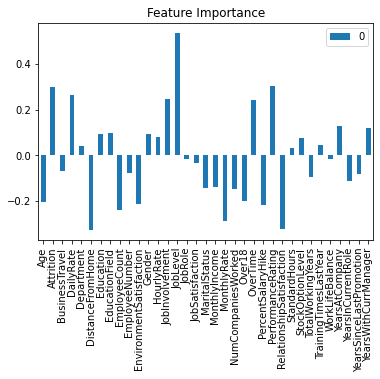

In [204]:
feature_data=pd.DataFrame(feature_dict,index=[0])
feature_data.T.plot(kind="bar",legend=True,title="Feature Importance")

##**Q. Choose any three examples to show the accuracy of all the predictions of employee Attrition.**

From our above result we can see, **Job Level, Job Involvement and Daily Rate** all these are most significant variables in determining employee attrition. If the company mostly looks after these areas then there will be a lesser chance of losing an employee.